# Earth Overshoot Day

Dataset: Global Footprint Network 
https://overshoot.footprintnetwork.org/newsroom/country-overshoot-days/

#### Earth Overshoot Day is the date would fall when the global population have consumed the resources to support one planet.

#### A Country Overshoot Day is the date on which the Earth Overshoot Day would fall if all of humanity consumed like the people in that country

Country overshoot days are published on 1 January of each year. It uses latest year of the most recent National Footprint and Biocapacity Accounts Edition. Therefore the 2024 country overshoot days are based on the 2023 edition.

The 2023 edition provides results from 1961 to 2022.
* 2020 - 2022 results based on a mix of actual data and preliminary estimates due to varying time lags in data reporting 
* Preliminary estiamtes are not final and less robust than the estimates up to 2020 - which are based on fully reported data sets


Example calculation of Swiss Overshoot Day:
- based on 2023 edition, ie datapoints for 2022

* Ecological Footprint of Switzerland per person in 2022 - 3.74 gha (global hectares)
* Global biocapacity in 2022 - 1.51 gha per person
* (3.74/1.51) = 2.5 Earths to support humanity if everyone on the planet lived like the people in Switzerland
* 2024 was a leap year: 366[days in 2024] * (1.51/3.74) = 148[days]
* 148th day is 27 May

Not all countries have an Overshoot Day - if a country's Ecological Footprint per person is smaller than the global biocapacity per person (1.5 gha). These countries are listed as 'None' and excluded from the table below.jup

### Questions to explore:

1. Calculate the Country Overshoot Days 2024 to see that they match the published data

2. Calculate number of countries with no overshoot

3. Plot a graph of dates-number of countries to see the spread of countries overshooting a lot to little. 
- Note, None values need to be on the right-hand side, assign as 1 Jan 2025?
Or even calculate the number of bonus days?

4. Further investigation using previous data to monitor how Overshoot Days have been changing through the years. eg
* Is the Earth Overshoot Day arriving earlier or later in the year?
* Does it correlate with this graph on LinkedIn from 1971-2023? https://www.linkedin.com/feed/update/urn:li:activity:7092413572202274816?updateEntityUrn=urn%3Ali%3Afs_feedUpdate%3A%28V2%2Curn%3Ali%3Aactivity%3A7092413572202274816%29
* Which countries are overshooting earlier and later? 
* eg. According to LinkedIn network, Sweden's was 3 April in 2023 and 21 April in 2024

5. Overshoot days are calculated based on ecological footprint by consumption. How would this compare with by production?
- eg does Sweden have a higher consumption than production, but China would be the other way round?
- what would the overshoot be if it's an average of consumption and production?

6. What is the relationship of overshoot days with other factors in the Global Footprint Network dataset? 
- eg life expectency v overshoot
- GDP v overshoot
- air quality (from the exam project!) and overshoot?


## Calculating a Country's Overshoot Day 2024


In [7]:
def CountryOvershootDay(country_footprint):
    from datetime import datetime

    global_footprint = 1.51
    day_num = int(366*(global_footprint/country_footprint))
    date = datetime.strptime("2022" + "-" + str(day_num), "%Y-%j").strftime("%Y-%m-%d")
    return date




In [8]:
CountryOvershootDay(3.74)

'2022-05-27'

From the "NFBA 2023 Public Data Package 1.0" Excel spreadsheet:
- Filter the "Country Results (2022 estimate)" tab to export a csv with columns: name of country, Total biocapacity (gha per person), official Country Overshoot Day
- Use CountryOvershootDay() to add Date as a new colum
- Compare with Global Footprint's calculation

In [17]:
import pandas as pd
from datetime import datetime

# Import filtered table from Global Footprint Network
df = pd.read_csv("2022_country_estimates.csv")
df = df.rename(columns = {"Total Ecological Footprint (Consumption)" : "country_footprint", "Number of Earths required" : "num_Earths","official \n Country Overshoot Day \n (for use in 2024)" : "official_overshoot_day" })

# country_footprint = total ecological footprint global hectares per person (consumption)
df


,Country,Region,country_footprint,num_Earths,official_overshoot_day
0,Afghanistan,Middle East/Central Asia,0.801465,0.5,NaN
1,Albania,Other Europe,2.071238,1.4,"September 23, 2024"
2,Algeria,Africa,2.222968,1.5,"September 4, 2024"
3,Angola,Africa,0.857846,0.6,NaN
4,Antigua and Barbuda,Central America/Caribbean,2.936735,1.9,"July 6, 2024"
...,...,...,...,...,...
176,"Venezuela, Bolivarian Republic of",South America,2.109537,1.4,"September 18, 2024"
177,Viet Nam,Asia-Pacific,2.432274,1.6,"August 14, 2024"
178,Yemen,Middle East/Central Asia,0.613258,0.4,NaN
179,Zambia,Africa,1.213215,0.8,NaN


In [2]:
df.describe()

,country_footprint,num_Earths
count,181.000000,181.000000
mean,2.962467,1.965193
std,2.195733,1.454783
min,0.554030,0.400000
25%,1.219524,0.800000
50%,2.319782,1.500000
75%,3.841834,2.500000
max,13.126334,8.700000


In [11]:
df.country_footprint.notna().sum()

# one country has a null value

181

In [12]:
df.loc[df.country_footprint == df.country_footprint.max()]

# Qatar has the highest footprint in the world

,Country,Region,country_footprint,num_Earths,official_overshoot_day
130,Qatar,Middle East/Central Asia,13.126334,8.7,"February 11, 2024"


In [13]:
df.loc[df.country_footprint == df.country_footprint.min()]

# 5 countries with lowest footprint, consuming only 0.4 planets and no overshoot day


,Country,Region,country_footprint,num_Earths,official_overshoot_day
136,Rwanda,Africa,0.55403,0.4,NaN


In [14]:
df[df.Country.str.contains("Switzerland")]


,Country,Region,country_footprint,num_Earths,official_overshoot_day
156,Switzerland,Other Europe,3.735964,2.5,"May 27, 2024"


In [3]:
df[df.Country.str.contains("Bermuda")]

# NaN value for Bermuda

,Country,Region,country_footprint,num_Earths,official_overshoot_day


In [16]:
# Adding a new column "overshoot_day" to apply CountryOvershootDay()

from datetime import datetime

# Fuction to calculate overshoot day
def CountryOvershootDay(country_footprint):
         if country_footprint == 0:
                 return None
         else:
            global_footprint = 1.51 # 2024 figure
            day_num = int(366*(global_footprint/country_footprint))
            date = datetime.strptime("2022" + "-" + str(day_num), "%Y-%j").strftime("%Y-%m-%d")
            return date

df['country_footprint'] = pd.to_numeric(df['country_footprint'], errors='coerce')

# Apply function row-wise to calculate overshoot_day
df["overshoot_day"] = df["country_footprint"].apply(CountryOvershootDay)

ValueError: unconverted data remains: 9

### Investigating why the function above returns a value error.

- which country doesn't have a value
- replace with value from the original dataset (also NA for most columns in 2024 and 2023 tables)
- remove row from datasset

TDLR: empty row found for Bermuda with no value for country_footprint

In [ ]:
# Convert 'country_footprint' column to numeric data type
df['country_footprint_numeric'] = pd.to_numeric(df['country_footprint'], errors='coerce')

# Check for non-numeric values
non_numeric_values = df[df['country_footprint_numeric'].isna()]['country_footprint']
print("Non-numeric values in 'country_footprint' column:")
print(non_numeric_values)


Non-numeric values in 'country_footprint' column:
17   NaN
Name: country_footprint, dtype: float64


In [ ]:
# Filter DataFrame to show rows where 'country_footprint' is NaN
nan_values_df = df[df['country_footprint_numeric'].isna()]

# Display the rows with NaN values in 'country_footprint'
print("Rows with NaN values in 'country_footprint' column:")
print(nan_values_df)


Rows with NaN values in 'country_footprint' column:
    Country         Region  country_footprint  num_Earths  \
17  Bermuda  North America                NaN         NaN   

   offical_overshoot_day  country_footprint_numeric  
17                   NaN                        NaN  


In [ ]:
df = df[df["Country"] != "Bermuda"]
df.reset_index(drop = True, inplace = True)

In [ ]:
# Check that Bermuda has been removed from the dataframe

df[df.Country.str.contains("Bermuda")]

# has been removed


,Country,Region,country_footprint,num_Earths,official_overshoot_day


In [ ]:
df

,Country,Region,country_footprint,num_Earths,official_overshoot_day
0,Afghanistan,Middle East/Central Asia,0.801465,0.5,NaN
1,Albania,Other Europe,2.071238,1.4,"September 23, 2024"
2,Algeria,Africa,2.222968,1.5,"September 4, 2024"
3,Angola,Africa,0.857846,0.6,NaN
4,Antigua and Barbuda,Central America/Caribbean,2.936735,1.9,"July 6, 2024"
...,...,...,...,...,...
176,"Venezuela, Bolivarian Republic of",South America,2.109537,1.4,"September 18, 2024"
177,Viet Nam,Asia-Pacific,2.432274,1.6,"August 14, 2024"
178,Yemen,Middle East/Central Asia,0.613258,0.4,NaN
179,Zambia,Africa,1.213215,0.8,NaN


In [ ]:
from datetime import datetime

# Fuction to calculate overshoot day
def CountryOvershootDay(country_footprint):
         global_footprint = 1.51 # 2024 figure
         day_num = int(366*(global_footprint/country_footprint))
         date = datetime.strptime("2022" + "-" + str(day_num), "%Y-%j").strftime("%Y-%m-%d")
         return date


# Apply function row-wise to calculate overshoot_day
df["overshoot_day"] = df["country_footprint"].apply(CountryOvershootDay)

ValueError: unconverted data remains: 9

### Investigating why it continues to return value error:

- Function works for Switzerland but not for all the countries
- Appears to be a data type issue, relating to float values
- Manually testing "country_footprint" values show <1.6 returns an error
- How can this be resolved mathematically?

TLDR:
Some countries' day_num is higher than 366, therfore have more number of days to convert into datetime for 2025, but will run over into 2025 or beyond

In [ ]:
CountryOvershootDay(1.51)

# Any countries with a footprint lower than 1.51 will 'overshoot' its budget the following year
# ie. 1.51 is the Earth Overshoot Day

'2023-01-01'

In [ ]:
# Seeing what date is returned between country_footprint 1.5 and 1.6

def day_number(country_footprint):
    day_num = int(366*(1.51/country_footprint))
    return day_num

In [ ]:
day_number(1.5)

# more than 366 days a year

368

In [18]:
# adding a statement to account for day_num > 366

from datetime import datetime

# Fuction to calculate overshoot day
def CountryOvershootDay(country_footprint):
         global_footprint = 1.51 # 2024 figure
         day_num = int(366*(global_footprint/country_footprint))
        
        # accounting for countries using less than 1 year of resources
         if day_num > 366: # running into 2025
                 day_num -= 366 # leap year in 2024
                 if day_num > 365: # running into 2026
                         day_num -= 365
                         date = datetime.strptime("2026-" + str(day_num), "%Y-%j").strftime("%Y-%m-%d")                         
                 else:
                         date = datetime.strptime("2025-" + str(day_num), "%Y-%j").strftime("%Y-%m-%d")
         else:   
                date = datetime.strptime("2024-" + str(day_num), "%Y-%j").strftime("%Y-%m-%d")
         return date


# Apply function row-wise to calculate overshoot_day
df["overshoot_day"] = df["country_footprint"].apply(CountryOvershootDay)

df

,Country,Region,country_footprint,num_Earths,official_overshoot_day,overshoot_day
0,Afghanistan,Middle East/Central Asia,0.801465,0.5,NaN,2025-11-19
1,Albania,Other Europe,2.071238,1.4,"September 23, 2024",2024-09-22
2,Algeria,Africa,2.222968,1.5,"September 4, 2024",2024-09-04
3,Angola,Africa,0.857846,0.6,NaN,2025-10-05
4,Antigua and Barbuda,Central America/Caribbean,2.936735,1.9,"July 6, 2024",2024-07-06
...,...,...,...,...,...,...
176,"Venezuela, Bolivarian Republic of",South America,2.109537,1.4,"September 18, 2024",2024-09-17
177,Viet Nam,Asia-Pacific,2.432274,1.6,"August 14, 2024",2024-08-14
178,Yemen,Middle East/Central Asia,0.613258,0.4,NaN,2026-06-19
179,Zambia,Africa,1.213215,0.8,NaN,2025-03-30


In [19]:
df[df.Country.str.contains("Switzerland")]


,Country,Region,country_footprint,num_Earths,official_overshoot_day,overshoot_day
156,Switzerland,Other Europe,3.735964,2.5,"May 27, 2024",2024-05-26


In [6]:
df[df.Country.str.contains("China")]


,Country,Region,country_footprint,num_Earths,official_overshoot_day,overshoot_day
33,China,Asia-Pacific,3.618649,2.4,"June 1, 2024",2024-05-31


### There is a descrepancy between the Official Overshoot Day and my calcualted overshoot_day.

- Some of my numbers are 1 day or more than the Official dates
- Double check Global Footprint Network's calculation methodology
- Could this be due to GFN rounding off numbers in the calculation?
- Country's Ecological footprint in global hectares per person in the spreadsheet/csv is rounded to 1 decimal place (3.7), but the Switzerland example was to 2decimal place (3.74)

TLDR: 
- my reference dataset uses the maximum decimal place for the country's ecological footprint, so it is more precis than the GFN
- now corrected to same day (56) or 1 day earlier (70) than GFN's

In [ ]:
# Converting the offical dates to the same YYYY-MM-DD format for consistency and ease of comparison

df['official_overshoot_day'] = pd.to_datetime(df['official_overshoot_day'])
df


,Country,Region,country_footprint,num_Earths,official_overshoot_day,overshoot_day
0,Afghanistan,Middle East/Central Asia,0.801465,0.5,NaT,2025-11-19
1,Albania,Other Europe,2.071238,1.4,2024-09-23,2024-09-22
2,Algeria,Africa,2.222968,1.5,2024-09-04,2024-09-04
3,Angola,Africa,0.857846,0.6,NaT,2025-10-05
4,Antigua and Barbuda,Central America/Caribbean,2.936735,1.9,2024-07-06,2024-07-06
...,...,...,...,...,...,...
176,"Venezuela, Bolivarian Republic of",South America,2.109537,1.4,2024-09-18,2024-09-17
177,Viet Nam,Asia-Pacific,2.432274,1.6,2024-08-14,2024-08-14
178,Yemen,Middle East/Central Asia,0.613258,0.4,NaT,2026-06-19
179,Zambia,Africa,1.213215,0.8,NaT,2025-03-30


In [20]:
# Calculating difference between calculated overshoot days and official overshoot days

# Convert 'overshoot_day' column to datetime format for consistency
df['overshoot_day'] = pd.to_datetime(df['overshoot_day'])

# Convert 'official_overshoot_day' column to datetime format, handle NaN values
df['official_overshoot_day'] = pd.to_datetime(df['official_overshoot_day'], errors='coerce')

# Perform subtraction and extract the number of days
df['difference'] = (df['overshoot_day'] - df['official_overshoot_day']).dt.days

df


,Country,Region,country_footprint,num_Earths,official_overshoot_day,overshoot_day,difference
0,Afghanistan,Middle East/Central Asia,0.801465,0.5,NaT,2025-11-19,NaN
1,Albania,Other Europe,2.071238,1.4,2024-09-23,2024-09-22,-1.0
2,Algeria,Africa,2.222968,1.5,2024-09-04,2024-09-04,0.0
3,Angola,Africa,0.857846,0.6,NaT,2025-10-05,NaN
4,Antigua and Barbuda,Central America/Caribbean,2.936735,1.9,2024-07-06,2024-07-06,0.0
...,...,...,...,...,...,...,...
176,"Venezuela, Bolivarian Republic of",South America,2.109537,1.4,2024-09-18,2024-09-17,-1.0
177,Viet Nam,Asia-Pacific,2.432274,1.6,2024-08-14,2024-08-14,0.0
178,Yemen,Middle East/Central Asia,0.613258,0.4,NaT,2026-06-19,NaN
179,Zambia,Africa,1.213215,0.8,NaT,2025-03-30,NaN


In [21]:
df.groupby('difference').size()

# now corrected. 56 entries are the same, 70 are one day earlier due to longer decimal places
# original 1 decimal place columns resulted in a big difference in days - ranging from my calculations being 8 days too early or 11 days too late compared to the official days


difference
-1.0    70
 0.0    56
dtype: int64

### 2. Countries with no overshoot

- How many are there?
- Who are they?
- When is their Overshoot Day?

In [ ]:
df[df.country_footprint < 1.51]

,Country,Region,country_footprint,num_Earths,official_overshoot_day,overshoot_day,difference
0,Afghanistan,Middle East/Central Asia,0.801465,0.5,NaT,2025-11-19,NaN
3,Angola,Africa,0.857846,0.6,NaT,2025-10-05,NaN
11,Bangladesh,Asia-Pacific,0.670725,0.4,NaT,2026-04-02,NaN
16,Benin,Africa,1.110590,0.7,NaT,2025-05-11,NaN
24,Burkina Faso,Africa,0.897787,0.6,NaT,2025-09-06,NaN
25,Burundi,Africa,0.593606,0.4,NaT,2026-07-19,NaN
26,Cabo Verde,Africa,1.162179,0.8,NaT,2025-04-19,NaN
27,Cambodia,Asia-Pacific,1.339451,0.9,NaT,2025-02-15,NaN
28,Cameroon,Africa,1.044024,0.7,NaT,2025-06-12,NaN
30,Central African Republic,Africa,1.116874,0.7,NaT,2025-05-08,NaN


In [ ]:
df[df.country_footprint < 1.51].count()

# 55 countries with overshoot day in 2025 and 2026

Country                   55
Region                    55
country_footprint         55
num_Earths                55
official_overshoot_day     0
overshoot_day             55
difference                 0
dtype: int64

In [ ]:
df2026 = df[df.overshoot_day > '2026']
df2026


,Country,Region,country_footprint,num_Earths,official_overshoot_day,overshoot_day,difference
11,Bangladesh,Asia-Pacific,0.670725,0.4,NaT,2026-04-02,NaN
25,Burundi,Africa,0.593606,0.4,NaT,2026-07-19,NaN
37,"Congo, Democratic Republic of",Africa,0.685390,0.5,NaT,2026-03-16,NaN
52,Eritrea,Africa,0.724095,0.5,NaT,2026-02-01,NaN
73,Haiti,Central America/Caribbean,0.591012,0.4,NaT,2026-07-23,NaN
100,Malawi,Africa,0.724282,0.5,NaT,2026-02-01,NaN
122,Pakistan,Asia-Pacific,0.729967,0.5,NaT,2026-01-26,NaN
136,Rwanda,Africa,0.554030,0.4,NaT,2026-09-23,NaN
161,Timor-Leste,Asia-Pacific,0.567020,0.4,NaT,2026-08-31,NaN
178,Yemen,Middle East/Central Asia,0.613258,0.4,NaT,2026-06-19,NaN


In [ ]:
df2026.count()

# 10 countries with an overshoot day in 2026

Country                   10
Region                    10
country_footprint         10
num_Earths                10
official_overshoot_day     0
overshoot_day             10
difference                 0
dtype: int64

In [ ]:
df2026.sort_values('overshoot_day')

,Country,Region,country_footprint,num_Earths,official_overshoot_day,overshoot_day,difference
122,Pakistan,Asia-Pacific,0.729967,0.5,NaT,2026-01-26,NaN
52,Eritrea,Africa,0.724095,0.5,NaT,2026-02-01,NaN
100,Malawi,Africa,0.724282,0.5,NaT,2026-02-01,NaN
37,"Congo, Democratic Republic of",Africa,0.685390,0.5,NaT,2026-03-16,NaN
11,Bangladesh,Asia-Pacific,0.670725,0.4,NaT,2026-04-02,NaN
178,Yemen,Middle East/Central Asia,0.613258,0.4,NaT,2026-06-19,NaN
25,Burundi,Africa,0.593606,0.4,NaT,2026-07-19,NaN
73,Haiti,Central America/Caribbean,0.591012,0.4,NaT,2026-07-23,NaN
161,Timor-Leste,Asia-Pacific,0.567020,0.4,NaT,2026-08-31,NaN
136,Rwanda,Africa,0.554030,0.4,NaT,2026-09-23,NaN


## 3. Plot a graph of dates-number of countries 
- See the spread of countries overshooting a lot to little. 
- Note: None values need to be on the right-hand side, assign as 1 Jan 2025?
- Or even calculate the number of bonus days?
- colour coordinate based on continent

In [ ]:
# number of regions = 7

df['Region'].unique()

array(['Middle East/Central Asia', 'Other Europe', 'Africa',
       'Central America/Caribbean', 'South America', 'Asia-Pacific',
       'EU-27', 'North America'], dtype=object)

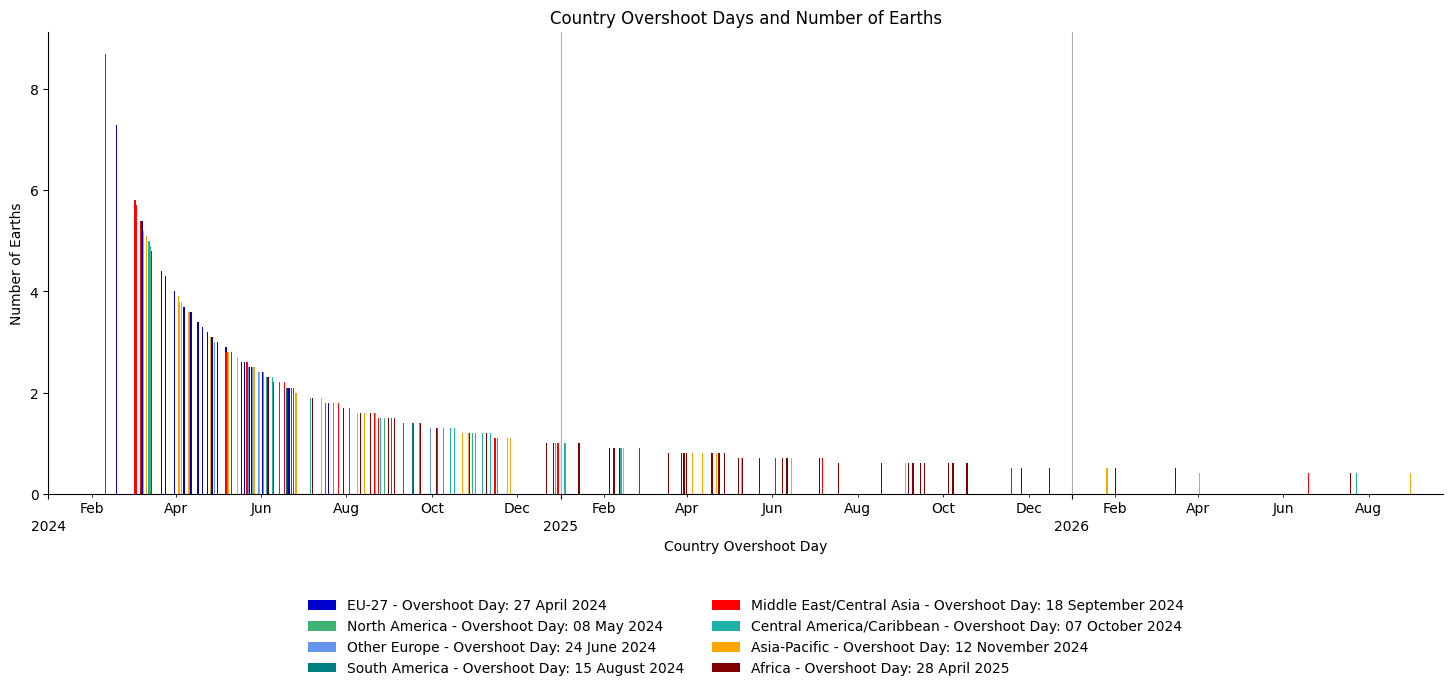

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator


# Colourmap for the regions
region_colours = {
    'North America' : 'mediumseagreen',
    'Central America/Caribbean' : 'lightseagreen',
    'South America' : 'teal',
    'EU-27' : 'mediumblue',
    'Other Europe' : 'cornflowerblue',    
    'Africa' : 'maroon',
    'Middle East/Central Asia' : 'red',
    'Asia-Pacific' : 'orange'
}

# Map region names to colours
# colours = df['Region'].map(region_colours)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18,6))

# Create a separate bar plot for each region:
for region, color in region_colours.items():
    region_data = df[df['Region'] == region]
    plt.bar(region_data['overshoot_day'], region_data['num_Earths'], color=color, 
            label=f'{region} - Overshoot Day: {region_data['overshoot_day'].mean().strftime('%d %B %Y')}')
    

# Titles and labels
ax.set_title("Country Overshoot Days and Number of Earths")
ax.set_xlabel("Country Overshoot Day")
ax.set_ylabel("Number of Earths")


# Format x-axis
# Format x-axis ticks as months
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

# Set x-axis tick labels to display every 2 months
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=2))

# Add ticks to indicate year changes
ax.xaxis.set_major_locator(mdates.YearLocator())

# Display minor ticks as year labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Adjust position of year lables to be below month labels
ax.tick_params(axis='x', which='major', pad=15)

# Set x-axis limits to start from the origin
start_date = datetime(2024,1,1)
ax.set_xlim(start_date, df['overshoot_day'].max())


# Format y-axis
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.grid(which='major', axis='x')


# Hide top spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display legend based on average overshoot day by region
# get legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# sort legend labels based on the average overshoot day
sorted_labels = sorted(labels, key=lambda x: datetime.strptime(x.split(': ')[-1].strip(), '%d %B %Y'))
sorted_handles = [handles[labels.index(label)] for label in sorted_labels]

# Recreate legend with sorted labels and handles
legend = ax.legend(sorted_handles, sorted_labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), frameon=False, ncol=2)


# save figure
fig.savefig('EarthOvershoot.pdf')

plt.show()

Questions to answer on the graph:

- Interactive graph? Show country names on hover
- Show the Earth Overshoot Day for 2024 for the world
- Show the average number of Earths to show general over consumption on a planetary level (dash-dot)
- Show grid lines for 1 number of Earth - dotted, green - same as countries from 2025

- Show countries with overshoot days mid-Dec to Feb as examples?

- Format axis label colours and font sizes

Completed

- Show grid lines for year change
- Show only x-y axis lines
- Averge Overshoot Day and/or Number of Earths on the legend?
- Legend to display in the order as the list, over two columns in the legend box



Other visualisation tools
* try Plotly instead of Matplotlib?
* create dashboard using PyLit